# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [6]:
import json
import pandas as pd
import numpy as np
import requests
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

chat = open('data/result.json', encoding='utf8')
data = json.load(chat)

msgs = data['messages']
dmain = pd.DataFrame(msgs)

dataframe = dmain.filter(items = ['id','from', 'reply_to_message_id' ,'text'])

dataframe


,id,from,reply_to_message_id,text
0,2779,NaN,NaN,
1,2780,NaN,NaN,
2,2781,NaN,NaN,
3,2782,NaN,NaN,
4,2783,NaN,NaN,
...,...,...,...,...
83,2910,Lucas Galdame,NaN,buenisimo profe gracias!!
84,2911,Arian M,NaN,Ok profe 👍🏻
85,2918,Gabriel Arenas 🇦🇷,NaN,"Buenas tardes chicos, arrancamos meet a las 1..."
86,2919,Santiago Martinez,NaN,


In [ ]:
## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   88 non-null     int64  
 1   from                 67 non-null     object 
 2   reply_to_message_id  8 non-null      float64
 3   text                 88 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes


In [16]:
missing = []
for column in dataframe.columns:
    attribute = {}
    attribute["column"] = column
    # Obtener promedio de valores nulos para la columna
    attribute["percentage"] = np.mean(dataframe[column].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    attribute["quantity"] = np.sum(dataframe[column].isnull())
    missing.append(attribute)  

# Convertir lista de diccionarios en dataframe
missing_df = pd.DataFrame(missing)

missing_df

,column,percentage,quantity
0,id,0.000000,0
1,from,23.863636,21
2,reply_to_message_id,90.909091,80
3,text,0.000000,0


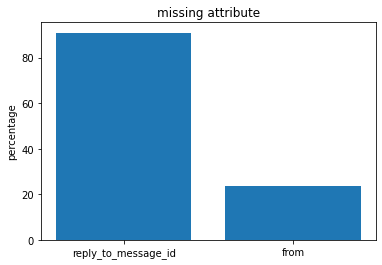

In [17]:
missing_df = missing_df.sort_values('percentage', ascending=False)

df_new_p = missing_df.loc[(missing_df['percentage'] > 0)]

plt.bar(df_new_p["column"], df_new_p["percentage"])
plt.ylabel('percentage')
plt.title('missing attribute')
plt.show()

In [24]:
dataframe_global = dataframe.copy(deep=False)

media = dataframe_global['reply_to_message_id'].mean()

dataframe_global['reply_to_message_id'] = dataframe_global['reply_to_message_id'].fillna(media)

dataframe_global['from'] = dataframe_global['from'].fillna('user')

dataframe_global

,id,from,reply_to_message_id,text
0,2779,user,2818.25,
1,2780,user,2818.25,
2,2781,user,2818.25,
3,2782,user,2818.25,
4,2783,user,2818.25,
...,...,...,...,...
83,2910,Lucas Galdame,2818.25,buenisimo profe gracias!!
84,2911,Arian M,2818.25,Ok profe 👍🏻
85,2918,Gabriel Arenas 🇦🇷,2818.25,"Buenas tardes chicos, arrancamos meet a las 1..."
86,2919,Santiago Martinez,2818.25,


NameError: name 'missing_df' is not defined

In [25]:
missing = []
for column in dataframe.columns:
    attribute = {}
    attribute["column"] = column
    # Obtener promedio de valores nulos para la columna
    attribute["percentage"] = np.mean(dataframe_global[column].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    attribute["quantity"] = np.sum(dataframe_global[column].isnull())
    missing.append(attribute)  

# Convertir lista de diccionarios en dataframe
missing_df = pd.DataFrame(missing)

missing_df

,column,percentage,quantity
0,id,0.0,0
1,from,0.0,0
2,reply_to_message_id,0.0,0
3,text,0.0,0


## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [7]:
dataframe.describe()

,id,reply_to_message_id
count,88.000000,8.000000
mean,2846.306818,2818.250000
std,48.011818,24.487606
min,2779.000000,2804.000000
25%,2801.750000,2807.500000
50%,2823.500000,2809.500000
75%,2892.250000,2815.250000
max,2920.000000,2878.000000


- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

In [26]:
Q1 = dataframe_global.quantile(0.25)
Q3 = dataframe_global.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



id                     90.5
reply_to_message_id     0.0
dtype: float64


In [30]:
lower_rank = Q1 - 1.5 * IQR
upper_rank = Q3 + 1.5 * IQR

In [31]:
print("Top rank")
print(lower_rank)
print("Lower range")
print(upper_rank)

Top rank
id                     2666.00
reply_to_message_id    2818.25
dtype: float64
Lower range
id                     3028.00
reply_to_message_id    2818.25
dtype: float64


In [32]:
df_outliers = (dataframe_global < lower_rank) | (dataframe_global > upper_rank)
df_outliers

<ipython-input-32-8bb7d9213e0a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (dataframe_global < lower_rank) | (dataframe_global > upper_rank)
<ipython-input-32-8bb7d9213e0a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (dataframe_global < lower_rank) | (dataframe_global > upper_rank)


,from,id,reply_to_message_id,text
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
83,False,False,False,False
84,False,False,False,False
85,False,False,False,False
86,False,False,False,False


<AxesSubplot:>

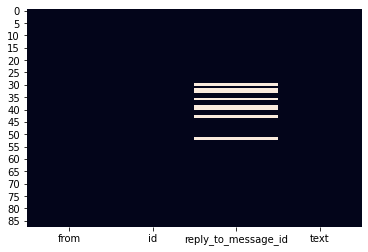

In [33]:
sns.heatmap(df_outliers, cbar=False)